<a href="https://colab.research.google.com/github/archanaanbalagan11/CodeAlpha-Projects/blob/main/Sentimental_Anlyasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_ds, test_ds = dataset['train'], dataset['test']

# Convert to pandas DataFrame (example: first 5 entries)
import itertools
examples = list(itertools.islice(train_ds, 5))
df = pd.DataFrame({
    'review': [str(example[0].numpy().decode('utf-8')) for example in examples],
    'label': [int(example[1].numpy()) for example in examples]
})
print(df)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S5F0B1_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S5F0B1_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.S5F0B1_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
                                              review  label
0  This was an absolutely terrible movie. Don't b...      0
1  I have been known to fall asleep during films,...      0
2  Mann photographs the Alberta Rocky Mountains i...      0
3  This is the kind of film for a snowy Sunday af...      1
4  As others have mentioned, all the women that g...      1


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load data (top 10k words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Decode word indices to text (requires loading word index)
from tensorflow.keras.datasets import imdb
word_index = imdb.get_word_index()
index_rev = {i+3: word for word, i in word_index.items()}
index_rev[0], index_rev[1], index_rev[2] = '[pad]', '[start]', '[unk]'

def decode_review(encoded):
    return ' '.join(index_rev.get(i, '?') for i in encoded)

print("Sample review:", decode_review(X_train[0]))
print("Label:", y_train[0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample review: [start] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [unk] is an amazing actor and now the same being director [unk] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [unk] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [unk] to the two little boy's that played the [unk] of norman and paul they were just brilliant children are often left out of the [unk] list i think because the stars that play them 

In [ ]:
# Step 1: Download dataset from Stanford
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Step 2: Extract the dataset
!tar -xvzf aclImdb_v1.tar.gz


Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import os
import pandas as pd

def load_imdb_data(base_path='aclImdb', subset='train'):
    data = {'review': [], 'sentiment': []}
    for label in ['pos', 'neg']:
        folder = os.path.join(base_path, subset, label)
        for fname in os.listdir(folder):
            with open(os.path.join(folder, fname), 'r', encoding='utf-8') as f:
                data['review'].append(f.read())
                data['sentiment'].append(label)
    return pd.DataFrame(data)

df_train = load_imdb_data(subset='train')
df_test  = load_imdb_data(subset='test')

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)


Train shape: (25000, 2)
Test shape: (25000, 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/44953_0.txt
aclImdb/train/unsup/44952_0.txt
aclImdb/train/unsup/44951_0.txt
aclImdb/train/unsup/44950_0.txt
aclImdb/train/unsup/44949_0.txt
aclImdb/train/unsup/44948_0.txt
aclImdb/train/unsup/44947_0.txt
aclImdb/train/unsup/44946_0.txt
aclImdb/train/unsup/44945_0.txt
aclImdb/train/unsup/44944_0.txt
aclImdb/train/unsup/44943_0.txt
aclImdb/train/unsup/4

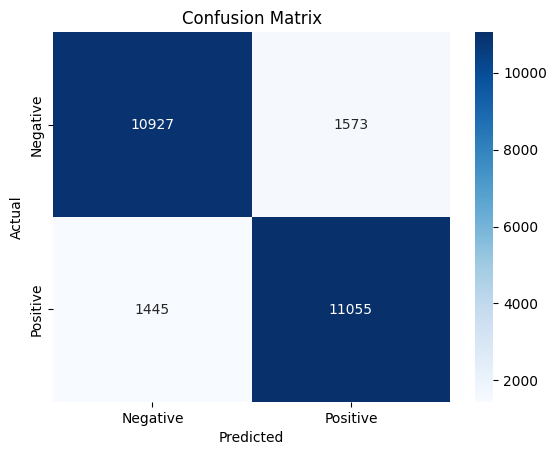


 Sample Review: The movie was absolutely fantastic! I loved it.
Predicted Sentiment: Positive


In [ ]:
# Sentiment Analysis Project - CodeAlpha Task 3 (All-in-One Cell)

# Step 1: Install + Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Download and Extract IMDB Dataset
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xvzf aclImdb_v1.tar.gz

# Step 3: Load dataset into Pandas DataFrame
def load_imdb_data(base_path='aclImdb', subset='train'):
    data = {'review': [], 'sentiment': []}
    for label in ['pos', 'neg']:
        folder = os.path.join(base_path, subset, label)
        for fname in os.listdir(folder):
            with open(os.path.join(folder, fname), 'r', encoding='utf-8') as f:
                data['review'].append(f.read())
                data['sentiment'].append(label)
    return pd.DataFrame(data)

df_train = load_imdb_data(subset='train')
df_test  = load_imdb_data(subset='test')

# Step 4: Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)              # remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)         # keep only letters
    text = re.sub(r'\s+', ' ', text)               # remove extra spaces
    return text

df_train['review'] = df_train['review'].apply(clean_text)
df_test['review']  = df_test['review'].apply(clean_text)

# Step 5: Features + Labels
X_train = df_train['review']
y_train = df_train['sentiment'].map({'pos':1, 'neg':0})
X_test  = df_test['review']
y_test  = df_test['sentiment'].map({'pos':1, 'neg':0})

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Step 8: Evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Custom Prediction
sample_review = "The movie was absolutely fantastic! I loved it."
sample_vec = vectorizer.transform([sample_review])
prediction = model.predict(sample_vec)[0]
print("\n Sample Review:", sample_review)
print("Predicted Sentiment:", "Positive" if prediction==1 else "Negative")
